In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

concrete = pd.read_csv("gv_data1.csv")
print(concrete.columns)

Index(['num', 't', 'area_osc', 'Peak.us', 'FT.1', 'FT.3', 'FT.5', 'FT.7',
       'FT.9', 'Tag.Mpa', 'sid', 'fname'],
      dtype='object')


In [2]:
concrete.head()

,num,t,area_osc,Peak.us,FT.1,FT.3,FT.5,FT.7,FT.9,Tag.Mpa,sid,fname
0,0,30.0,304.827141,36.237609,0.000543,0.003428,0.001337,0.001436,0.000421,19.890,0,070221-box2_pair 4 C 12cm.csv
1,1,42.0,373.486940,34.972416,0.000584,0.003857,0.001608,0.001652,0.000654,23.930,0,070221-box2_pair 4 C 12cm.csv
2,2,50.0,359.549229,34.488487,0.000588,0.003586,0.001755,0.001888,0.000749,25.755,0,070221-box2_pair 4 C 12cm.csv
3,3,66.0,400.218680,33.887021,0.000559,0.003973,0.001692,0.002030,0.000971,30.090,0,070221-box2_pair 4 C 12cm.csv
4,4,120.0,448.345157,32.980691,0.000556,0.004180,0.001931,0.002559,0.001346,33.965,0,070221-box2_pair 4 C 12cm.csv


In [3]:
print("dimension of concrete data: {}".format(concrete.shape))

dimension of concrete data: (798, 12)


In [4]:
concrete['Tag.Mpa'].describe()

count    798.000000
mean      30.718484
std       11.535976
min        5.710000
25%       22.595000
50%       29.480000
75%       38.940000
max       63.585000
Name: Tag.Mpa, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tag.Mpa', ylabel='Density'>

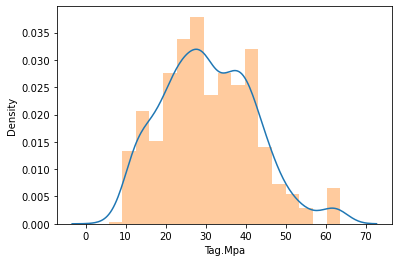

In [5]:
import seaborn as sns

sns.distplot(concrete['Tag.Mpa'],kde=True, kde_kws={"color":"tab:blue"}, hist_kws={"color":"tab:orange"})

In [6]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num       798 non-null    int64  
 1   t         798 non-null    float64
 2   area_osc  798 non-null    float64
 3   Peak.us   798 non-null    float64
 4   FT.1      798 non-null    float64
 5   FT.3      798 non-null    float64
 6   FT.5      798 non-null    float64
 7   FT.7      798 non-null    float64
 8   FT.9      798 non-null    float64
 9   Tag.Mpa   798 non-null    float64
 10  sid       798 non-null    int64  
 11  fname     798 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 74.9+ KB


In [7]:
concrete.drop(['num','t','sid','fname'], axis=1, inplace=True)
concrete.head()

,area_osc,Peak.us,FT.1,FT.3,FT.5,FT.7,FT.9,Tag.Mpa
0,304.827141,36.237609,0.000543,0.003428,0.001337,0.001436,0.000421,19.890
1,373.486940,34.972416,0.000584,0.003857,0.001608,0.001652,0.000654,23.930
2,359.549229,34.488487,0.000588,0.003586,0.001755,0.001888,0.000749,25.755
3,400.218680,33.887021,0.000559,0.003973,0.001692,0.002030,0.000971,30.090
4,448.345157,32.980691,0.000556,0.004180,0.001931,0.002559,0.001346,33.965


In [8]:
X = concrete[['area_osc','Peak.us','FT.1','FT.3','FT.5','FT.7','FT.9']]
y = concrete['Tag.Mpa']

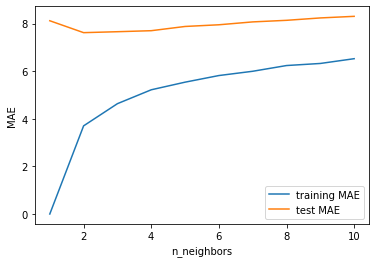

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.neighbors import KNeighborsRegressor

training_mae = []
test_mae = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    # record training set expected error
    training_mae.append(mean_absolute_error(y_train, y_pred))
    # record test set expected error
    y_pred1 = knn.predict(X_test)
    test_mae.append(mean_absolute_error(y_test, y_pred1))
    
plt.plot(neighbors_settings, training_mae, label="training MAE")
plt.plot(neighbors_settings, test_mae, label="test MAE")
plt.ylabel("MAE")
plt.xlabel("n_neighbors")
plt.legend()

In [10]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)
y_pred1 = knn.predict(X_test)
k1 = mean_absolute_error(y_train, y_pred)
k2 = mean_absolute_error(y_test, y_pred1)

print("MAE of KNN Regressor on training set: {:.3f}".format(k1))
print("MAE of KNN Regressor on test set: {:.3f}".format(k2))

MAE of KNN Regressor on training set: 5.821
MAE of KNN Regressor on test set: 7.955


In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_train)
y_pred1 = linreg.predict(X_test)
l1 = mean_absolute_error(y_train, y_pred)
l2 = mean_absolute_error(y_test, y_pred1)

print("MAE of Linear Regression on training set: {:.3f}".format(l1))
print("MAE of Linear Regression on test set: {:.3f}".format(l2))

MAE of Linear Regression on training set: 6.065
MAE of Linear Regression on test set: 6.576


In [12]:
concrete_features = [x for i,x in enumerate(X.columns) if i!=7]

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
y_pred1 = tree.predict(X_test)
t1 = mean_absolute_error(y_train, y_pred)
t2 = mean_absolute_error(y_test, y_pred1)

print("MAE of Decision Tree Regressor on training set: {:.3f}".format(t1))
print("MAE of Decision Tree Regressor on test set: {:.3f}".format(t2))

MAE of Decision Tree Regressor on training set: 0.000
MAE of Decision Tree Regressor on test set: 4.208


In [13]:
tree1 = DecisionTreeRegressor(random_state=42, max_depth=11)
tree1.fit(X_train, y_train)

y_pred = tree1.predict(X_train)
y_pred1 = tree1.predict(X_test)
t3 = mean_absolute_error(y_train, y_pred)
t4 = mean_absolute_error(y_test, y_pred1)

print("MAE of Decision Tree Regressor on training set: {:.3f}".format(t3))
print("MAE of Decision Tree Regressor on test set: {:.3f}".format(t4))

MAE of Decision Tree Regressor on training set: 0.593
MAE of Decision Tree Regressor on test set: 4.190


In [14]:
print("Feature importances:\n{}".format(tree1.feature_importances_))

Feature importances:
[0.0798353  0.28033977 0.06243741 0.03522198 0.03051368 0.05825283
 0.45339904]


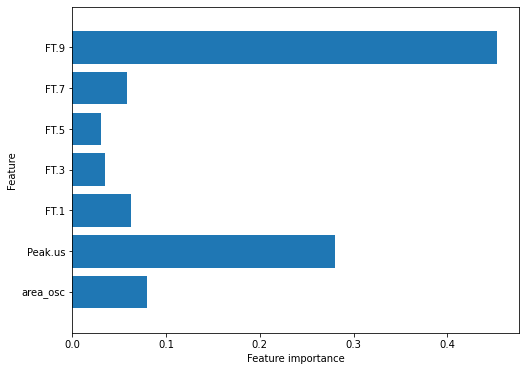

In [15]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), concrete_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree1)
plt.savefig('feature_importance')

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)
y_pred1 = rf.predict(X_test)
r1 = mean_absolute_error(y_train, y_pred)
r2 = mean_absolute_error(y_test, y_pred1)

print("MAE of Random Forest Regressor on training set: {:.3f}".format(r1))
print("MAE of Random Forest Regressor on test set: {:.3f}".format(r2))

MAE of Random Forest Regressor on training set: 1.428
MAE of Random Forest Regressor on test set: 3.351


In [17]:
rf1 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=11)
rf1.fit(X_train, y_train)

y_pred = rf1.predict(X_train)
y_pred1 = rf1.predict(X_test)
r3 = mean_absolute_error(y_train, y_pred)
r4= mean_absolute_error(y_test, y_pred1)

print("MAE of Random Forest Regressor on training set: {:.3f}".format(r3))
print("MAE of Random Forest Regressor on test set: {:.3f}".format(r4))

MAE of Random Forest Regressor on training set: 1.529
MAE of Random Forest Regressor on test set: 3.395


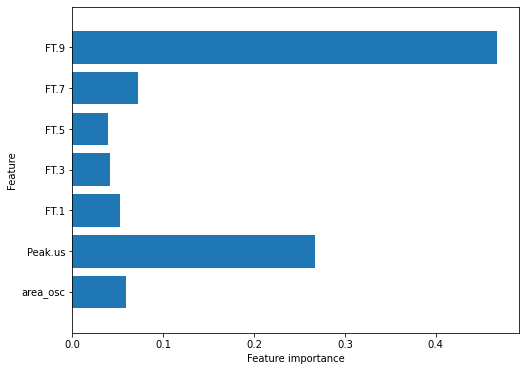

In [18]:
plot_feature_importances(rf)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_train)
y_pred1 = gb.predict(X_test)
g1 = mean_absolute_error(y_train, y_pred)
g2 = mean_absolute_error(y_test, y_pred1)

print("MAE of Gradient Boosting Regressor on training set: {:.3f}".format(g1))
print("MAE of Gradient Boosting Regressor on test set: {:.3f}".format(g2))

MAE of Gradient Boosting Regressor on training set: 2.355
MAE of Gradient Boosting Regressor on test set: 3.634


In [20]:
gb1 = GradientBoostingRegressor(random_state=42, max_depth=1)
gb1.fit(X_train, y_train)

y_pred = gb1.predict(X_train)
y_pred1 = gb1.predict(X_test)
g3 = mean_absolute_error(y_train, y_pred)
g4 = mean_absolute_error(y_test, y_pred1)

print("MAE of Gradient Boosting Regressor on training set: {:.3f}".format(g3))
print("MAE of Gradient Boosting Regressor on test set: {:.3f}".format(g4))

MAE of Gradient Boosting Regressor on training set: 4.373
MAE of Gradient Boosting Regressor on test set: 4.781


In [21]:
gb2 = GradientBoostingRegressor(random_state=42, learning_rate=0.01)
gb2.fit(X_train, y_train)

y_pred = gb2.predict(X_train)
y_pred1 = gb2.predict(X_test)
g5 = mean_absolute_error(y_train, y_pred)
g6 = mean_absolute_error(y_test, y_pred1)

print("MAE of Gradient Boosting Regressor on training set: {:.3f}".format(g5))
print("MAE of Gradient Boosting Regressor on test set: {:.3f}".format(g6))

MAE of Gradient Boosting Regressor on training set: 5.482
MAE of Gradient Boosting Regressor on test set: 6.072


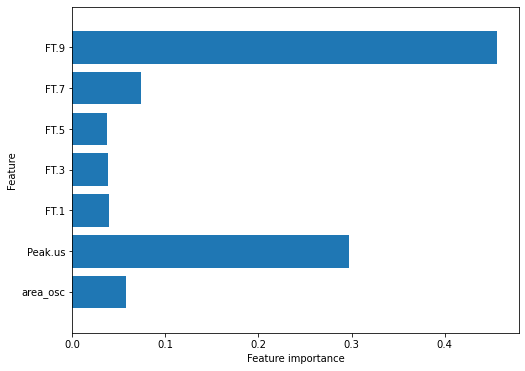

In [22]:
plot_feature_importances(gb)

In [23]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_train)
y_pred1 = svr.predict(X_test)
s1 = mean_absolute_error(y_train, y_pred)
s2 = mean_absolute_error(y_test, y_pred1)

print("MAE of Support Vector Regressor on training set: {:.3f}".format(s1))
print("MAE of Support Vector Regressor on test set: {:.3f}".format(s2))

MAE of Support Vector Regressor on training set: 7.704
MAE of Support Vector Regressor on test set: 8.707


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svr1 = SVR()
svr1.fit(X_train_scaled, y_train)

y_pred = svr1.predict(X_train_scaled)
y_pred1 = svr1.predict(X_test_scaled)
s3 = mean_absolute_error(y_train, y_pred)
s4 = mean_absolute_error(y_test, y_pred1)

print("MAE of Support Vector Regressor on training set: {:.3f}".format(s3))
print("MAE of Support Vector Regressor on test set: {:.3f}".format(s4))

MAE of Support Vector Regressor on training set: 5.355
MAE of Support Vector Regressor on test set: 6.390


In [25]:
svr2 = SVR(gamma=10)
svr2.fit(X_train_scaled, y_train)

y_pred = svr2.predict(X_train_scaled)
y_pred1 = svr2.predict(X_test_scaled)
s5 = mean_absolute_error(y_train, y_pred)
s6 = mean_absolute_error(y_test, y_pred1)

print("MAE of Support Vector Regressor on training set: {:.3f}".format(s5))
print("MAE of Support Vector Regressor on test set: {:.3f}".format(s6))

MAE of Support Vector Regressor on training set: 5.021
MAE of Support Vector Regressor on test set: 5.872


In [26]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_train)
y_pred1 = mlp.predict(X_test)
m1 = mean_absolute_error(y_train, y_pred)
m2 = mean_absolute_error(y_test, y_pred1)

print("MAE of MLP Regressor on training set: {:.3f}".format(m1))
print("MAE of MLP Regressor on test set: {:.3f}".format(m2))

MAE of MLP Regressor on training set: 8.439
MAE of MLP Regressor on test set: 9.663


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp1 = MLPRegressor(random_state=42)
mlp1.fit(X_train_scaled, y_train)

y_pred = mlp1.predict(X_train_scaled)
y_pred1 = mlp1.predict(X_test_scaled)
m3 = mean_absolute_error(y_train, y_pred)
m4 = mean_absolute_error(y_test, y_pred1)
print("MAE of MLP Regressor on training set: {:.3f}".format(m3))
print("MAE of MLP Regressor on test set: {:.3f}".format(m4))

MAE of MLP Regressor on training set: 6.635
MAE of MLP Regressor on test set: 7.018


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:
mlp2 = MLPRegressor(random_state=42, max_iter=1000)
mlp2.fit(X_train_scaled, y_train)

y_pred = mlp2.predict(X_train_scaled)
y_pred1 = mlp2.predict(X_test_scaled)
m5 = mean_absolute_error(y_train, y_pred)
m6 = mean_absolute_error(y_test, y_pred1)

print("MAE of MLP Regressor on training set: {:.3f}".format(m5))
print("MAE of MLP Regressor on test set: {:.3f}".format(m6))

MAE of MLP Regressor on training set: 4.069
MAE of MLP Regressor on test set: 4.510


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
mlp3 = MLPRegressor(random_state=42, max_iter=1000, alpha=1)
mlp3.fit(X_train_scaled, y_train)

y_pred = mlp3.predict(X_train_scaled)
y_pred1 = mlp3.predict(X_test_scaled)
m7 = mean_absolute_error(y_train, y_pred)
m8 = mean_absolute_error(y_test, y_pred1)

print("MAE of MLP Regressor on training set: {:.3f}".format(m7))
print("MAE of MLP Regressor on test set: {:.3f}".format(m8))

MAE of MLP Regressor on training set: 4.075
MAE of MLP Regressor on test set: 4.547


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


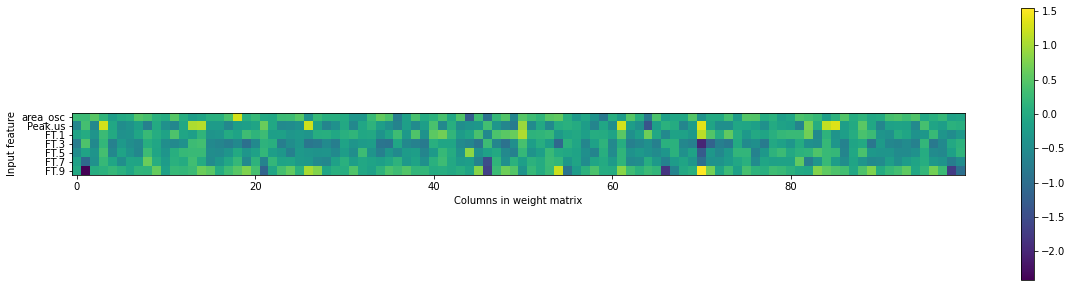

In [30]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp2.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(X.shape[1]), concrete_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [31]:
models = ["KNN Regressor", "Linear Regression", "Decision Tree Regressor" ,"Random Forest Regressor",
 "Gradient Boosting Regressor","Support Vector Regressor", "MLP Regressor"]
tests_mae = [k2, l2, t4, r2, g2, s6, m6]
compare_models = pd.DataFrame({ "Algorithms": models, "Tests MAE": tests_mae })
compare_models.sort_values(by = "Tests MAE", ascending = True)

,Algorithms,Tests MAE
3,Random Forest Regressor,3.351065
4,Gradient Boosting Regressor,3.633883
2,Decision Tree Regressor,4.189681
6,MLP Regressor,4.509878
5,Support Vector Regressor,5.871886
1,Linear Regression,6.576419
0,KNN Regressor,7.954821


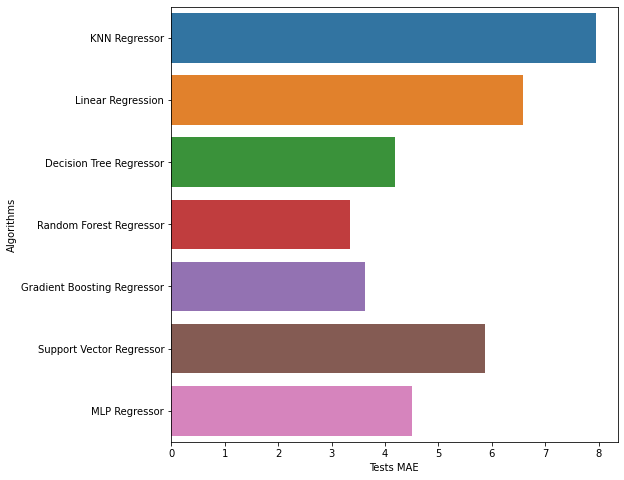

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests MAE", y = "Algorithms", data = compare_models)
plt.show()

In [33]:
from sklearn.metrics import r2_score

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest R squared: {:.4f}".format(r2_score(y_test, y_pred)))

Random Forest R squared: 0.8639


In [34]:
y_test1 = y_test.copy()
gross = []
for i in y_pred:
    gross.append(i)
df = pd.DataFrame(data=gross)
df = df.set_index(y_test1.index)
df.rename(columns={0: "predicted"}, inplace=True)
df1 = pd.concat([y_test1, df ], axis=1)
df1.columns = ["true", "predicted"]
df1.head()

,true,predicted
694,31.480000,30.498450
665,15.910000,14.690483
63,39.015000,36.763050
533,19.483333,26.423850
66,47.800000,40.952767


In [35]:
df1["diff"] = df1["predicted"] - df1["true"]
df1.head()

,true,predicted,diff
694,31.480000,30.498450,-0.981550
665,15.910000,14.690483,-1.219517
63,39.015000,36.763050,-2.251950
533,19.483333,26.423850,6.940517
66,47.800000,40.952767,-6.847233


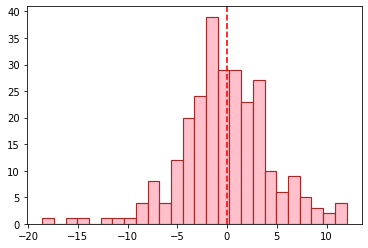

In [36]:
plt.hist(df1["diff"], bins=26, color="pink", edgecolor="brown", linewidth=1.2)
plt.axvline(0, color="red", linestyle="dashed", linewidth=1.6)
plt.show()

In [37]:
pd.DataFrame({"Count": [(df1["diff"]<0).sum(), (df1["diff"]==0).sum(),(df1["diff"]>0).sum()]}, columns=["Count"],index=["Underestimation", "Exact Estimation", "Overestimation"])

,Count
Underestimation,136
Exact Estimation,0
Overestimation,128


In [38]:
df1["Squared Error"] = 0.00
df1["Squared Error"] = ( df1['true'] - df1['predicted'] )**2
MSE = np.mean(df1["Squared Error"])
print("Random Forest MSE: {:.4f}".format(MSE))

Random Forest MSE: 20.0613


In [39]:
RMSE = np.sqrt(np.mean(df1["Squared Error"]))
print("Random Forest RMSE: {:.4f}".format(RMSE))

Random Forest RMSE: 4.4790


In [40]:
df1["Absolute Error"] = 0.00
df1["Absolute Error"] = abs( df1['true'] - df1['predicted'] )
MAE = np.mean(df1["Absolute Error"])
print("Random Forest MAE: {:.4f}".format(MAE))

Random Forest MAE: 3.3511


In [41]:
from sklearn.metrics import mean_squared_log_error
MSLE = mean_squared_log_error(y_test, y_pred)
print("Random Forest MSLE: {:.4%}".format(MSLE))

Random Forest MSLE: 2.3770%
